In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the data
data = pd.read_csv('MedicalPriceDataset.csv')

In [3]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [4]:
# Select features (age, bmi, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest) and target variable (charges)
X = data_encoded[['age', 'bmi', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']].values
y = data_encoded['charges'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

In [7]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Text(0.5, 1.0, 'Linear Regression Prediction')

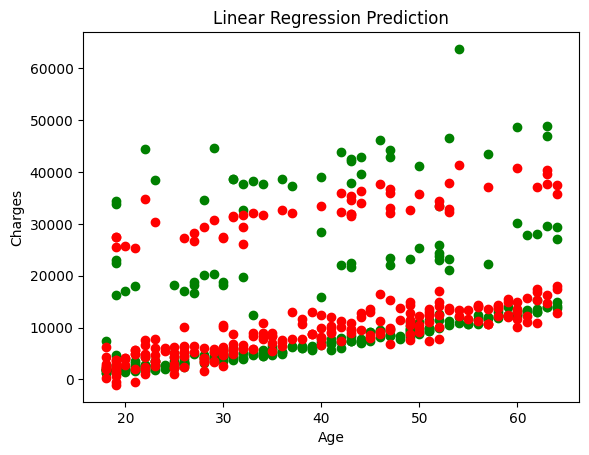

In [10]:
# Plot the test data, predictions
plt.scatter(X_test[:, 0], y_test, marker='o', color='green', label='Test Data')
plt.scatter(X_test[:, 0], y_pred, marker='o', color='red', label='Predictions')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Prediction')

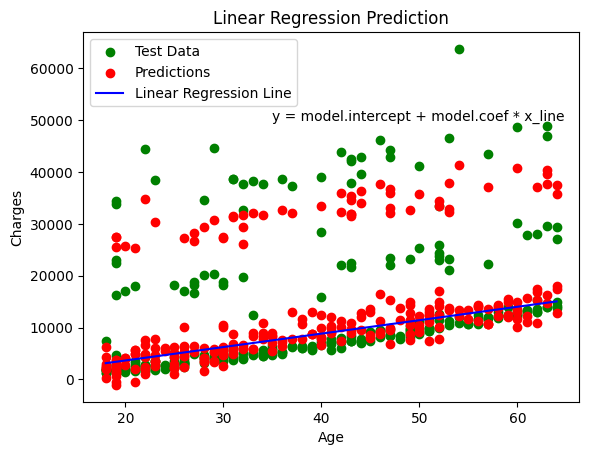

In [11]:
# Plot the test data, predictions, and regression line with formula
plt.scatter(X_test[:, 0], y_test, marker='o', color='green', label='Test Data')
plt.scatter(X_test[:, 0], y_pred, marker='o', color='red', label='Predictions')

# Add the linear regression line with formula
x_line = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 100)

#y_line_formula = model.intercept + model.coef * x_line  
#Assuming only one feature (age) is used
y_line_formula = -1551.59 + 259.26 * x_line

# Display the linear regression formula
formula_text = f'y = model.intercept + model.coef * x_line'
plt.text(35, 50000, formula_text, fontsize=10, color='black')

# Plot the linear regression line
plt.plot(x_line, y_line_formula, color='blue', label='Linear Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()